## Predict Students Dropout - Machine Learning Models

This notebook is responsible for building and evaluating machine learning models to predict student dropout. The models used logestic regession, random forest and support vector machine

### Steps

1. Read in Prepared Data: Load the prepared data from the previously saved CSV file.
2. Handle Missing Values: Handle any missing values in the dataset.
3. Split Features and Target Variables: Separate the feature variables (X) and the target variable (y).
4. Split Training and Testing Data: Split the dataset into training and testing sets to evaluate model performance.
5. Build and Evaluate Machine Learning Models: Construct and evaluate various machine learning models to predict student dropout.
6. Compare Model Performance: Compare the performance of different models to select the best one.
7. Visualise Model Performance: Visualise the accuracy and F1 score of the models.


In [66]:
""" install the required package to fetch the dataset for this project
from the UCI Machine Learning Repository """

#%pip install ucimlrepo
#%pip install xgboost
#%pip install cmake
#%pip install catboost

' install the required package to fetch the dataset for this project\nfrom the UCI Machine Learning Repository\xa0'

In [67]:
# Import required packages

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


### Step 1: Read in Prepared Data


In [68]:
# Read in Prepared Data
df = pd.read_csv('data/prep_data.csv')

### Step 2: Handle Missing Values

In [69]:
# Handle Missing Values
df.fillna(df.mean(), inplace=True)

### Step 3: Split Features and Target Variables

In [70]:
# Split Features and Target Variables
X = df.drop(columns=['Target_encoded'])
y = df['Target_encoded']

### Step 4: Split Training and Testing Data

In [71]:
# Split Training and Testing Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Step 5: Build and Evaluate Machine Learning Models

In [72]:
# Logistic Regression
logisticRegr = LogisticRegression(max_iter=1000)
logisticRegr_model = logisticRegr.fit(X_train, y_train)
y_pred_lr = logisticRegr_model.predict(X_test)

/Users/youssef/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Evaluate Logistic Regression Performance

Logistic Regression - Accuracy: 0.90%
Logistic Regression - F1 Score: 0.90
Logistic Regression - Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.83      0.86       277
           1       0.90      0.94      0.92       449

    accuracy                           0.90       726
   macro avg       0.90      0.88      0.89       726
weighted avg       0.90      0.90      0.90       726

Logistic Regression - Confusion Matrix:
 [[229  48]
 [ 27 422]]


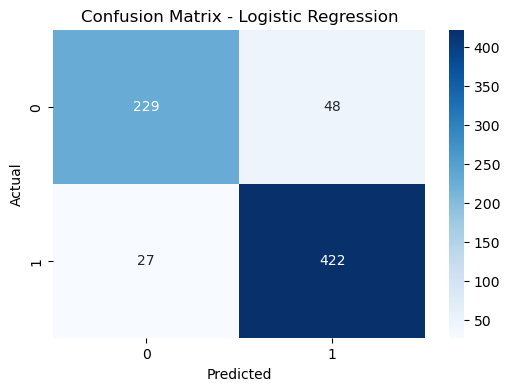

In [73]:
# Evaluate Logistic Regression Performance
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_f1 = f1_score(y_test, y_pred_lr, average='weighted')
print(f"Logistic Regression - Accuracy: {lr_accuracy:.2f}%")
print(f"Logistic Regression - F1 Score: {lr_f1:.2f}")
print("Logistic Regression - Classification Report:\n", classification_report(y_test, y_pred_lr))
print("Logistic Regression - Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

# Confusion Matrix for Logistic Regression
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### Random Forest Classifier

In [74]:
# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

### Evaluate Random Forest Performance

Random Forest - Accuracy: 0.90%
Random Forest - F1 Score: 0.90
Random Forest - Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.82      0.86       277
           1       0.90      0.95      0.92       449

    accuracy                           0.90       726
   macro avg       0.90      0.89      0.89       726
weighted avg       0.90      0.90      0.90       726

Random Forest - Confusion Matrix:
 [[228  49]
 [ 23 426]]


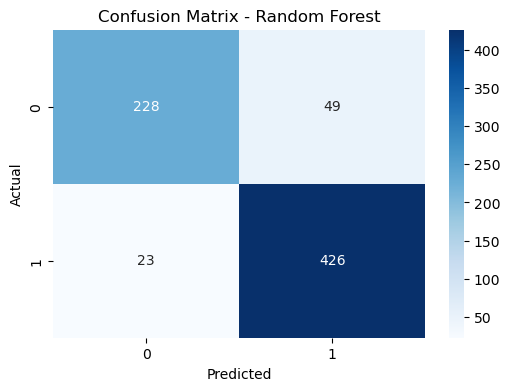

In [75]:
# Evaluate Random Forest Performance
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf, average='weighted')
print(f"Random Forest - Accuracy: {rf_accuracy:.2f}%")
print(f"Random Forest - F1 Score: {rf_f1:.2f}")
print("Random Forest - Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Random Forest - Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# Confusion Matrix for Random Forest
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### Support Vector Machine Classifier

In [76]:
# Support Vector Machine Classifier
svc_model = SVC(random_state=42)
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)

### Evaluate Support Vector Machine Performance

Support Vector Machine - Accuracy: 0.62%
Support Vector Machine - F1 Score: 0.47
Support Vector Machine - Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       277
           1       0.62      1.00      0.76       449

    accuracy                           0.62       726
   macro avg       0.31      0.50      0.38       726
weighted avg       0.38      0.62      0.47       726

Support Vector Machine - Confusion Matrix:
 [[  0 277]
 [  0 449]]


/Users/youssef/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/youssef/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/youssef/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


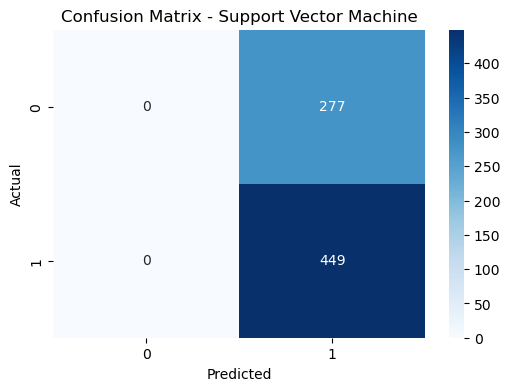

In [77]:
# Evaluate Support Vector Machine Performance
svc_accuracy = accuracy_score(y_test, y_pred_svc)
svc_f1 = f1_score(y_test, y_pred_svc, average='weighted')
print(f"Support Vector Machine - Accuracy: {svc_accuracy:.2f}%")
print(f"Support Vector Machine - F1 Score: {svc_f1:.2f}")
print("Support Vector Machine - Classification Report:\n", classification_report(y_test, y_pred_svc))
print("Support Vector Machine - Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svc))

# Confusion Matrix for Support Vector Machine
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_svc), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Support Vector Machine')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### Step 6: Compare Model Performance

In [78]:
# Compare Model Performance
model_performance = {
    'Model': ['Logistic Regression', 'Random Forest', 'Support Vector Machine'],
    'Accuracy': [lr_accuracy, rf_accuracy, svc_accuracy],
    'F1 Score': [lr_f1, rf_f1, svc_f1]
}

performance_df = pd.DataFrame(model_performance)
print(performance_df)

                    Model  Accuracy  F1 Score
0     Logistic Regression  0.896694  0.895839
1           Random Forest  0.900826  0.899780
2  Support Vector Machine  0.618457  0.472659


### Step 7: Visualize Model Performance

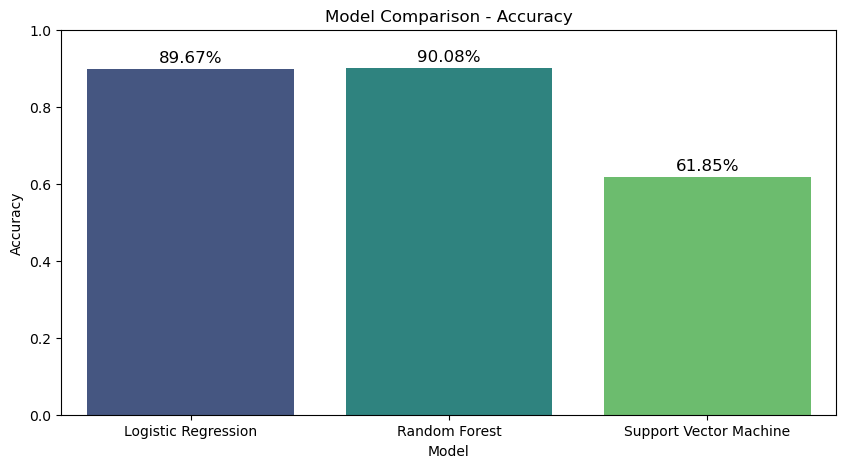

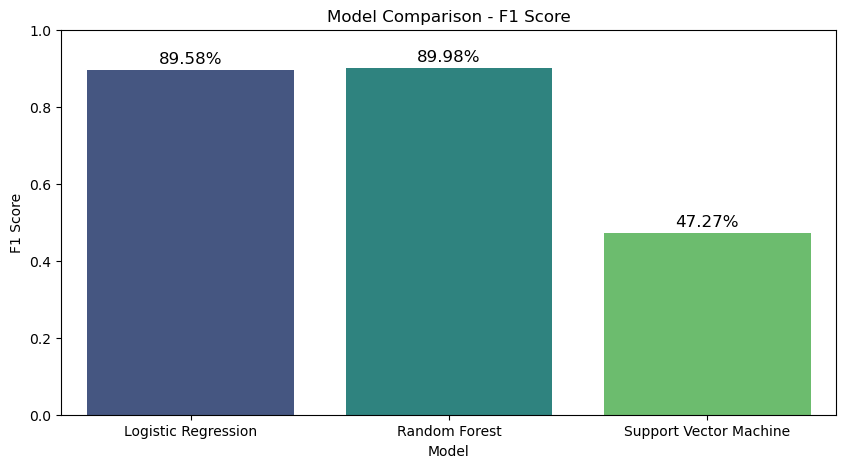

In [79]:
# Plot Accuracy
plt.figure(figsize=(10, 5))
bars = sns.barplot(x='Model', y='Accuracy', data=performance_df, palette='viridis')
plt.title('Model Comparison - Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.ylim(0, 1)
for bar in bars.patches:
    bars.annotate(f'{bar.get_height()*100:.2f}%',
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                  ha='center', va='center', size=12, xytext=(0, 8),
                  textcoords='offset points')
plt.show()

# Plot F1 Score
plt.figure(figsize=(10, 5))
bars = sns.barplot(x='Model', y='F1 Score', data=performance_df, palette='viridis')
plt.title('Model Comparison - F1 Score')
plt.ylabel('F1 Score')
plt.xlabel('Model')
plt.ylim(0, 1)
for bar in bars.patches:
    bars.annotate(f'{bar.get_height()*100:.2f}%',
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                  ha='center', va='center', size=12, xytext=(0, 8),
                  textcoords='offset points')
plt.show()